# Assignment 5

## Q1: Training a Basic CNN

### Q1.1: Load and prepare the dataset

Sample batch:


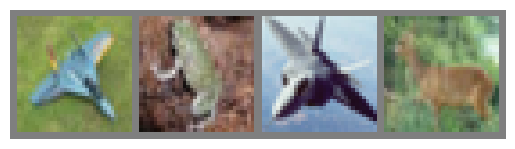

Labels:  plane frog  plane deer 


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Define transforms for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                              train=True,
                                              download=True, 
                                              transform=transform)

# Split the dataset into training, validation sets
train_size = 40000
validation_size = 10000
train_dataset, validation_dataset = torch.utils.data.random_split(
    cifar10_dataset, [train_size, validation_size])

# Load the test dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                           train=False,
                                           download=True, 
                                           transform=transform)

# Create data loaders for training, validation, and test datasets
batch_size = 4
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_dataset, 
                                               batch_size=batch_size,
                                               shuffle=False, 
                                               num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=batch_size,
                                         shuffle=False, 
                                         num_workers=2)

# Define the classes in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get a random batch from the training set and display
dataiter = iter(train_loader)
images, labels = next(dataiter)

print('Sample batch:')
imshow(torchvision.utils.make_grid(images))
print('Labels: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Q2.2: Implement the CNN architecture

In [5]:
# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First convolutional layer (3 input channels, 6 output channels, 5x5 kernel)
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max pooling with 2x2 window and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        # Second convolutional layer (6 input channels, 16 output channels, 5x5 kernel)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Calculate the input size for the first fully connected layer
        # Input image: 32x32
        # After first conv (5x5 kernel): 28x28
        # After first pooling (2x2, stride 2): 14x14
        # After second conv (5x5 kernel): 10x10
        # After second pooling (2x2, stride 2): 5x5
        # Total features: 16 channels * 5*5 = 16*25 = 400
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 output classes

    def forward(self, x):
        # First conv + ReLU + pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Second conv + ReLU + pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        # Apply the fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Final layer (no activation, as it will be applied in the loss function)
        x = self.fc3(x)
        return x

# Create an instance of the CNN
model = CNN()

### Q1.3/Q1.4: Train the model and evaluate performance

Using device: cpu
[Epoch 1, Batch 2000] loss: 2.174
[Epoch 1, Batch 4000] loss: 1.877
[Epoch 1, Batch 6000] loss: 1.697
[Epoch 1, Batch 8000] loss: 1.617
[Epoch 1, Batch 10000] loss: 1.544
Epoch 1, Training Accuracy: 34.45%, Validation Accuracy: 45.79%
[Epoch 2, Batch 2000] loss: 1.472
[Epoch 2, Batch 4000] loss: 1.440
[Epoch 2, Batch 6000] loss: 1.380
[Epoch 2, Batch 8000] loss: 1.376
[Epoch 2, Batch 10000] loss: 1.338
Epoch 2, Training Accuracy: 49.25%, Validation Accuracy: 53.95%
[Epoch 3, Batch 2000] loss: 1.252
[Epoch 3, Batch 4000] loss: 1.258
[Epoch 3, Batch 6000] loss: 1.246
[Epoch 3, Batch 8000] loss: 1.263
[Epoch 3, Batch 10000] loss: 1.234
Epoch 3, Training Accuracy: 55.38%, Validation Accuracy: 55.40%
[Epoch 4, Batch 2000] loss: 1.143
[Epoch 4, Batch 4000] loss: 1.151
[Epoch 4, Batch 6000] loss: 1.157
[Epoch 4, Batch 8000] loss: 1.166
[Epoch 4, Batch 10000] loss: 1.129
Epoch 4, Training Accuracy: 59.27%, Validation Accuracy: 59.05%
[Epoch 5, Batch 2000] loss: 1.075
[Epoch 5

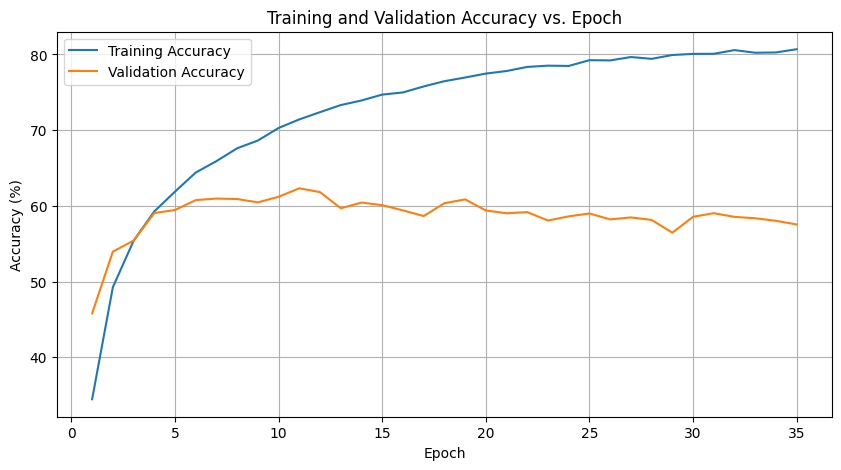


Test Accuracy for each class:
plane: 61.30%
car: 68.20%
bird: 51.90%
cat: 37.00%
deer: 55.90%
dog: 44.20%
frog: 63.80%
horse: 59.70%
ship: 73.00%
truck: 65.30%

Overall Test Accuracy: 58.03%


In [3]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to the appropriate device
model = model.to(device)

# Lists to store metrics for plotting
train_accuracy_history = []
val_accuracy_history = []

# Function to calculate accuracy
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
num_epochs = 35
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Training
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and move them to the device
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Track statistics
        running_loss += loss.item()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Print statistics every 2000 mini-batches
        if i % 2000 == 1999:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    # Calculate and store training accuracy
    train_accuracy = 100 * correct / total
    train_accuracy_history.append(train_accuracy)
    
    # Calculate validation accuracy
    model.eval()
    val_accuracy = calculate_accuracy(validation_loader, model)
    val_accuracy_history.append(val_accuracy)
    
    print(f'Epoch {epoch + 1}, Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%')

print('Finished Training')

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            if i < len(labels):  # Ensure we don't go out of bounds
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

# Print accuracy for each class
print('\nTest Accuracy for each class:')
for i in range(10):
    print(f'{classes[i]}: {100 * class_correct[i] / class_total[i]:.2f}%')

# Print overall test accuracy
print(f'\nOverall Test Accuracy: {100 * sum(class_correct) / sum(class_total):.2f}%')

## Q2: CNN Architecture

### Q2.1: Remove the last fully connected layer

[Epoch 1, Batch 2000] loss: 2.089
[Epoch 1, Batch 4000] loss: 1.713
[Epoch 1, Batch 6000] loss: 1.586
[Epoch 1, Batch 8000] loss: 1.523
[Epoch 1, Batch 10000] loss: 1.459
Epoch 1, Training Accuracy: 38.87%, Validation Accuracy: 48.98%
[Epoch 2, Batch 2000] loss: 1.405
[Epoch 2, Batch 4000] loss: 1.367
[Epoch 2, Batch 6000] loss: 1.358
[Epoch 2, Batch 8000] loss: 1.301
[Epoch 2, Batch 10000] loss: 1.296
Epoch 2, Training Accuracy: 51.91%, Validation Accuracy: 52.21%
[Epoch 3, Batch 2000] loss: 1.221
[Epoch 3, Batch 4000] loss: 1.236
[Epoch 3, Batch 6000] loss: 1.203
[Epoch 3, Batch 8000] loss: 1.194
[Epoch 3, Batch 10000] loss: 1.202
Epoch 3, Training Accuracy: 56.91%, Validation Accuracy: 56.66%
[Epoch 4, Batch 2000] loss: 1.109
[Epoch 4, Batch 4000] loss: 1.128
[Epoch 4, Batch 6000] loss: 1.145
[Epoch 4, Batch 8000] loss: 1.133
[Epoch 4, Batch 10000] loss: 1.126
Epoch 4, Training Accuracy: 60.43%, Validation Accuracy: 57.11%
[Epoch 5, Batch 2000] loss: 1.049
[Epoch 5, Batch 4000] loss

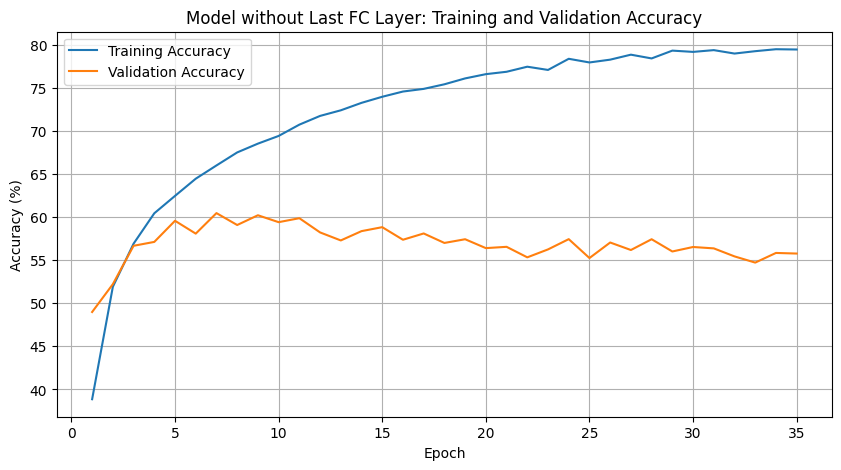

In [6]:
# Model with the last fully-connected layer removed
class CNNWithoutLastFC(nn.Module):
    def __init__(self):
        super(CNNWithoutLastFC, self).__init__()
        # First convolutional layer (3 input channels, 6 output channels, 5x5 kernel)
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max pooling with 2x2 window and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        # Second convolutional layer (6 input channels, 16 output channels, 5x5 kernel)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layers - keep the first FC layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Skip the second FC layer (120 to 84) and connect directly to output
        self.fc3 = nn.Linear(120, 10)  # 10 output classes

    def forward(self, x):
        # First conv + ReLU + pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Second conv + ReLU + pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        # Apply the first fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))
        # Final layer (skipping the middle FC layer)
        x = self.fc3(x)
        return x

# Create model instance and move to device
model_without_last_fc = CNNWithoutLastFC().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_without_last_fc.parameters(), lr=0.001, momentum=0.9)

# Lists to store metrics for plotting
train_accuracy_history_1 = []
val_accuracy_history_1 = []

# Training loop
num_epochs = 35
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Training
    model_without_last_fc.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model_without_last_fc(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if i % 2000 == 1999:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    train_accuracy = 100 * correct / total
    train_accuracy_history_1.append(train_accuracy)
    
    model_without_last_fc.eval()
    val_accuracy = calculate_accuracy(validation_loader, model_without_last_fc)
    val_accuracy_history_1.append(val_accuracy)
    
    print(f'Epoch {epoch + 1}, Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%')

print('Finished Training Model without Last FC Layer')

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_history_1, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history_1, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Model without Last FC Layer: Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Model without the last fully connected layer:

Removing the last fully-connected layer reduces the model's capacity to learn complex relationships between features. The direct connection from 120 neurons to 10 classes gives less representational power compared to the original model with an additional 84-neuron layer, potentially leading to underfitting. However, this model has fewer parameters which might help it train faster and could potentially generalize better if the original model was overfitting.

### Q2.2: Increase neurons in the first fully connected layer

[Epoch 1, Batch 2000] loss: 2.219
[Epoch 1, Batch 4000] loss: 1.836
[Epoch 1, Batch 6000] loss: 1.645
[Epoch 1, Batch 8000] loss: 1.563
[Epoch 1, Batch 10000] loss: 1.503
Epoch 1, Training Accuracy: 35.50%, Validation Accuracy: 48.25%
[Epoch 2, Batch 2000] loss: 1.440
[Epoch 2, Batch 4000] loss: 1.383
[Epoch 2, Batch 6000] loss: 1.353
[Epoch 2, Batch 8000] loss: 1.351
[Epoch 2, Batch 10000] loss: 1.312
Epoch 2, Training Accuracy: 50.80%, Validation Accuracy: 53.06%
[Epoch 3, Batch 2000] loss: 1.225
[Epoch 3, Batch 4000] loss: 1.219
[Epoch 3, Batch 6000] loss: 1.198
[Epoch 3, Batch 8000] loss: 1.195
[Epoch 3, Batch 10000] loss: 1.167
Epoch 3, Training Accuracy: 57.07%, Validation Accuracy: 57.02%
[Epoch 4, Batch 2000] loss: 1.057
[Epoch 4, Batch 4000] loss: 1.075
[Epoch 4, Batch 6000] loss: 1.087
[Epoch 4, Batch 8000] loss: 1.083
[Epoch 4, Batch 10000] loss: 1.070
Epoch 4, Training Accuracy: 61.95%, Validation Accuracy: 58.10%
[Epoch 5, Batch 2000] loss: 0.933
[Epoch 5, Batch 4000] loss

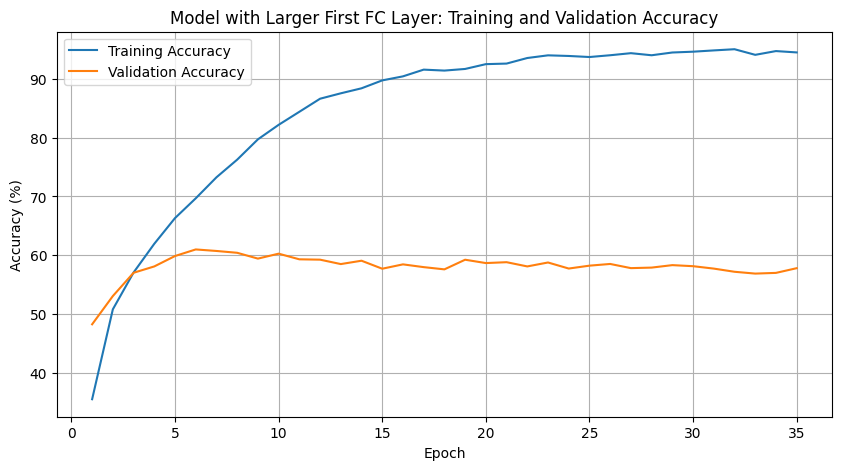

In [7]:
# Model with increased neurons in the first fully-connected layer
class CNNWithLargerFC(nn.Module):
    def __init__(self):
        super(CNNWithLargerFC, self).__init__()
        # First convolutional layer (3 input channels, 6 output channels, 5x5 kernel)
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max pooling with 2x2 window and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        # Second convolutional layer (6 input channels, 16 output channels, 5x5 kernel)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layers with increased neurons in the first FC layer
        self.fc1 = nn.Linear(16 * 5 * 5, 1000)  # Increased from 120 to 1000
        self.fc2 = nn.Linear(1000, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 output classes

    def forward(self, x):
        # First conv + ReLU + pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Second conv + ReLU + pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        # Apply the fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Final layer
        x = self.fc3(x)
        return x

# Create model instance and move to device
model_larger_fc = CNNWithLargerFC().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_larger_fc.parameters(), lr=0.001, momentum=0.9)

# Lists to store metrics for plotting
train_accuracy_history_2 = []
val_accuracy_history_2 = []

# Training loop
num_epochs = 35
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Training
    model_larger_fc.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model_larger_fc(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if i % 2000 == 1999:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    train_accuracy = 100 * correct / total
    train_accuracy_history_2.append(train_accuracy)
    
    model_larger_fc.eval()
    val_accuracy = calculate_accuracy(validation_loader, model_larger_fc)
    val_accuracy_history_2.append(val_accuracy)
    
    print(f'Epoch {epoch + 1}, Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%')

print('Finished Training Model with Larger First FC Layer')

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_history_2, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history_2, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Model with Larger First FC Layer: Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Model with increased neurons in the first fully connected layer:

Increasing the number of neurons in the first fully-connected layer from 120 to 1000 significantly increases the model's capacity. This allows the model to learn more complex patterns, potentially achieving higher training accuracy. However, the larger number of parameters makes the model more prone to overfitting, especially with limited training data, which may result in a wider gap between training and validation accuracy compared to the original model.

### Q2.3: Comment on early stopping

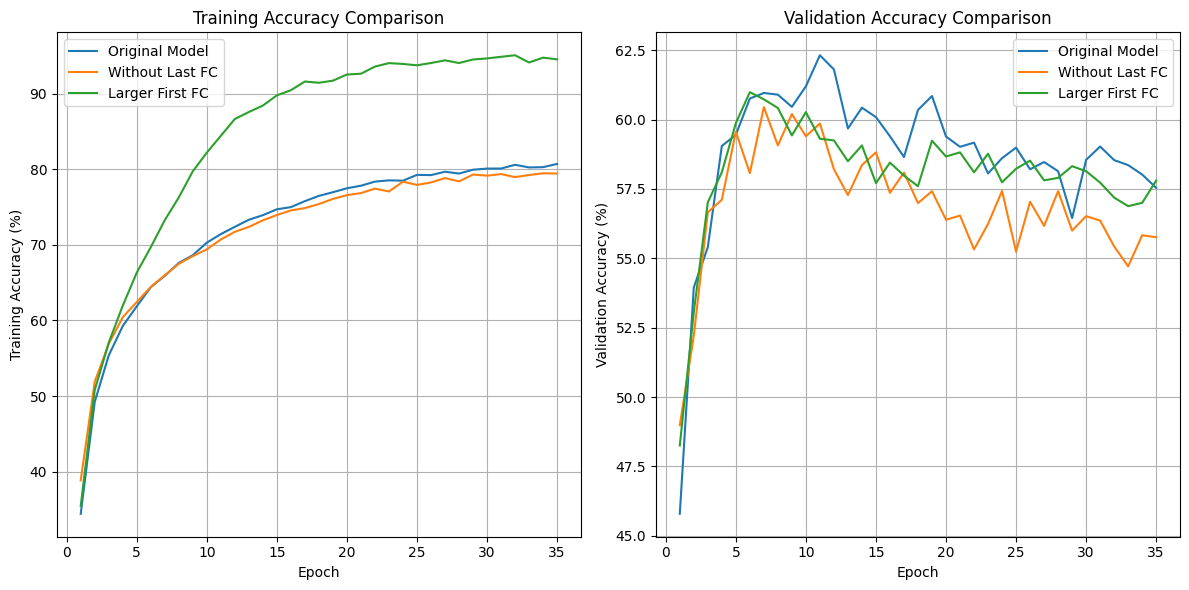

In [8]:
# Compare all three models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Original Model')
plt.plot(range(1, num_epochs + 1), train_accuracy_history_1, label='Without Last FC')
plt.plot(range(1, num_epochs + 1), train_accuracy_history_2, label='Larger First FC')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Original Model')
plt.plot(range(1, num_epochs + 1), val_accuracy_history_1, label='Without Last FC')
plt.plot(range(1, num_epochs + 1), val_accuracy_history_2, label='Larger First FC')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Early stopping would likely improve generalization in both models, particularly for the larger model with 1000 neurons which has higher capacity and is more susceptible to overfitting, by preventing the model from memorizing training data and stopping training when validation performance starts deteriorating.